# Final Project Submission

Please fill out:
* Student name: Justin Hue
* Student pace: self paced / part time / full time: FT
* Scheduled project review date/time: 
* Instructor name: Yish Lim
* Blog post URL:
* Video of 5-min Non-Technical Presentation:

## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>
 
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
___

# INTRODUCTION

# OBTAIN

In [523]:
#importing standard packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
%matplotlib inline
from statsmodels.formula.api import ols

# SCRUB

In [524]:
#importing data, dropping duplicates, dropping unnecessary columns, filling null values
df1 = pd.read_csv('data/kc_house_data.csv', header=0, encoding='latin-1')
df1 = df1.drop_duplicates()
df1.drop(['date','view','sqft_above', 'sqft_basement', 'yr_renovated', 
'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'id'],axis=1,inplace=True)
df1 = df1.fillna(0)

Creating dummy variables for waterfront.

In [525]:
df1 = pd.get_dummies(data=df1, columns=['waterfront'])
df1 = df1.rename(columns={'waterfront_1.0':'waterfront_y',
                          'waterfront_0.0':'waterfront_n'})

In [526]:
#Altering data set to only include houses with 5 or less bedrooms
df1 = df1.loc[df1['bedrooms'] <= 5]
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,waterfront_n,waterfront_y
0,221900.0,3,1.00,1180,5650,1.0,3,7,1955,1,0
1,538000.0,3,2.25,2570,7242,2.0,3,7,1951,1,0
2,180000.0,2,1.00,770,10000,1.0,3,6,1933,1,0
3,604000.0,4,3.00,1960,5000,1.0,5,7,1965,1,0
4,510000.0,3,2.00,1680,8080,1.0,3,8,1987,1,0
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,3,8,2009,1,0
21593,400000.0,4,2.50,2310,5813,2.0,3,8,2014,1,0
21594,402101.0,2,0.75,1020,1350,2.0,3,7,2009,1,0
21595,400000.0,3,2.50,1600,2388,2.0,3,8,2004,1,0


# EXPLORE

In [527]:
X_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
          'condition', 'grade', 'yr_built', 'waterfront_n', 'waterfront_y']

In [528]:
#sorted values by prices (high to low)
x_var = df1.drop('price', axis=1)
x_var

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,waterfront_n,waterfront_y
0,3,1.00,1180,5650,1.0,3,7,1955,1,0
1,3,2.25,2570,7242,2.0,3,7,1951,1,0
2,2,1.00,770,10000,1.0,3,6,1933,1,0
3,4,3.00,1960,5000,1.0,5,7,1965,1,0
4,3,2.00,1680,8080,1.0,3,8,1987,1,0
...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,3,8,2009,1,0
21593,4,2.50,2310,5813,2.0,3,8,2014,1,0
21594,2,0.75,1020,1350,2.0,3,7,2009,1,0
21595,3,2.50,1600,2388,2.0,3,8,2004,1,0


- Different X variables plotted against prices to show relationships and linearity.

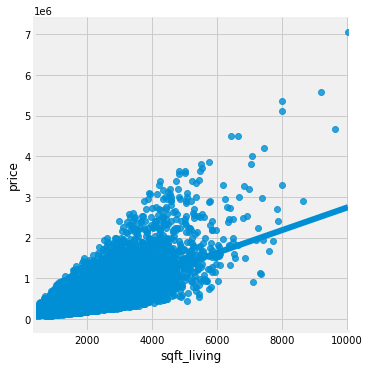

In [529]:
#plotting house sq footage against prices
sns.lmplot(data=df1, x='sqft_living',y='price');

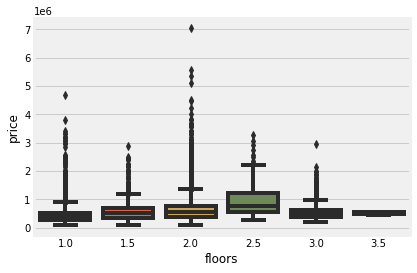

In [530]:
sns.boxplot(data=df1, x='floors',y='price');

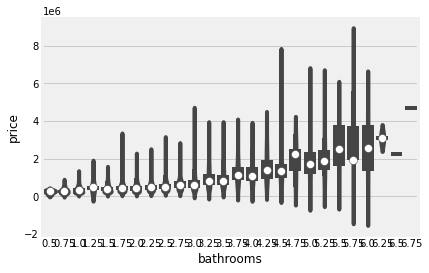

In [531]:
#plotting bathroom numbers against prices
sns.violinplot(data=df1, y='price', x='bathrooms');

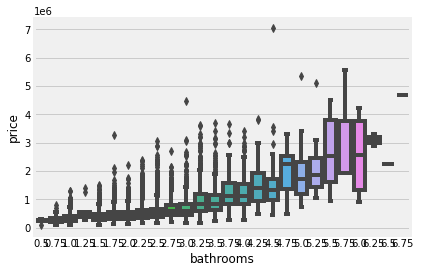

In [532]:
sns.boxplot(data=df1, y='price', x='bathrooms');

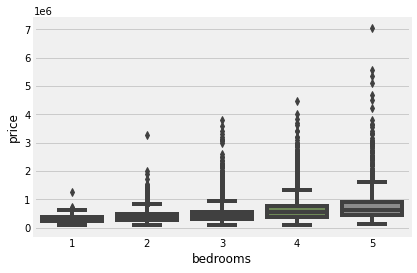

In [533]:
#plotting bedroom numbers against prices
sns.boxplot(data=df1, y='price', x='bedrooms');

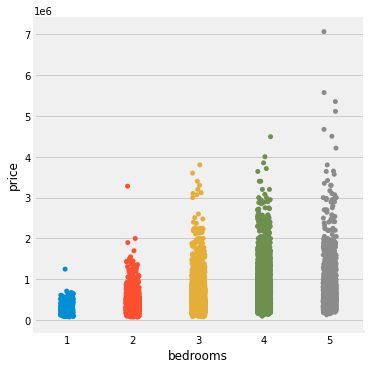

In [534]:
pricexroom = sns.catplot(data=df1, y='price', x='bedrooms');

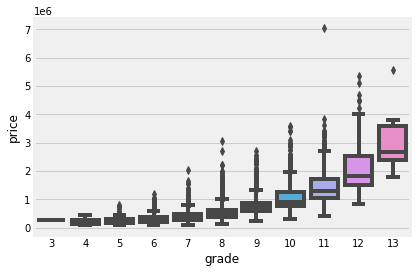

In [535]:
sns.boxplot(data=df1, y='price', x='grade');

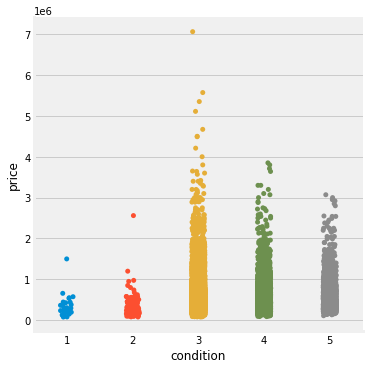

In [536]:
sns.catplot(data=df1, x='condition', y='price');

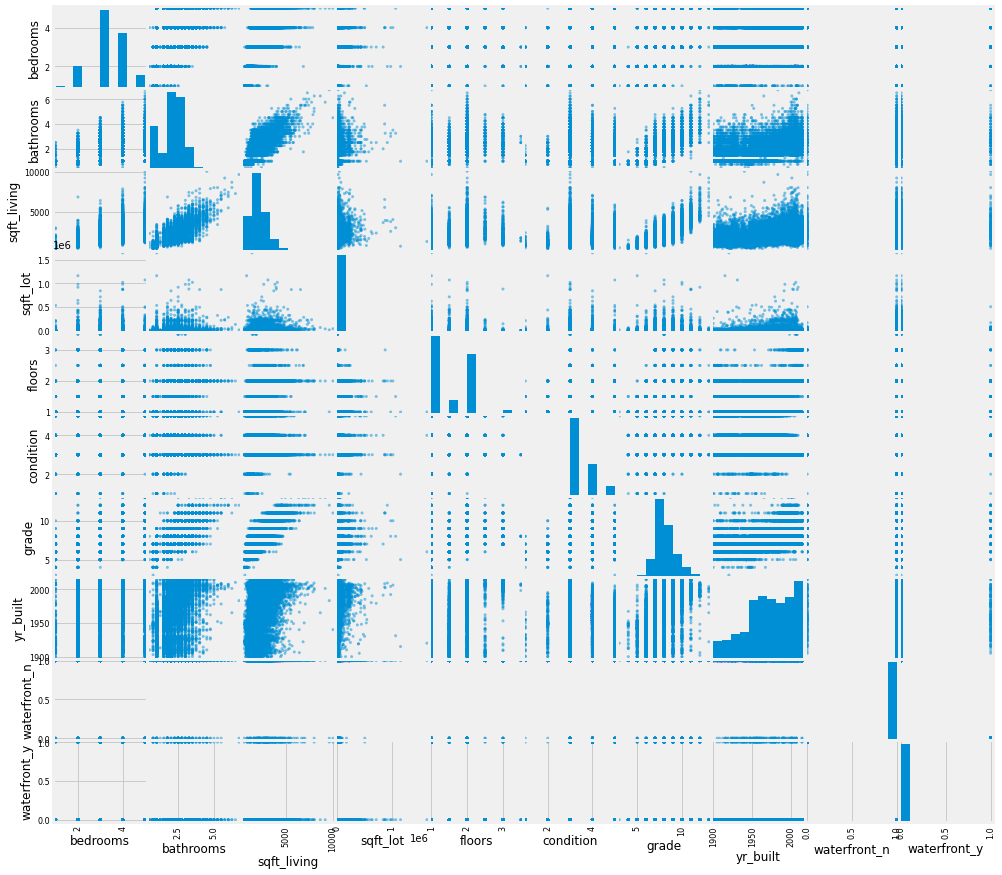

In [537]:
#Scatter Matrix to show relationships

df1_pred = df1.iloc[:,1:11]
pd.plotting.scatter_matrix(df1_pred,figsize  = [15, 15]);
plt.show()

- Below is two different visuals for correlation.

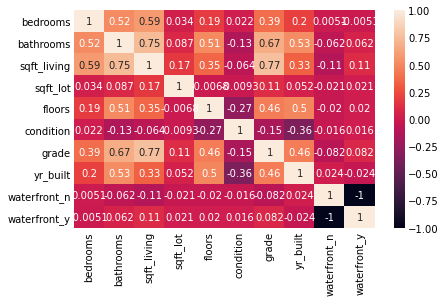

In [538]:
sns.heatmap(df1_pred.corr(), annot=True);

In [539]:
df1_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,waterfront_n,waterfront_y
bedrooms,1.000000,0.516771,0.590997,0.033895,0.187446,0.022055,0.386365,0.197471,0.005088,-0.005088
bathrooms,0.516771,1.000000,0.749850,0.086682,0.507936,-0.129502,0.672854,0.526513,-0.061548,0.061548
sqft_living,0.590997,0.749850,1.000000,0.171037,0.352919,-0.064301,0.767759,0.334369,-0.105272,0.105272
sqft_lot,0.033895,0.086682,0.171037,1.000000,-0.006754,-0.009339,0.113313,0.052362,-0.021281,0.021281
floors,0.187446,0.507936,0.352919,-0.006754,1.000000,-0.266767,0.458708,0.498932,-0.019964,0.019964
condition,0.022055,-0.129502,-0.064301,-0.009339,-0.266767,1.000000,-0.151464,-0.363064,-0.015931,0.015931
grade,0.386365,0.672854,0.767759,0.113313,0.458708,-0.151464,1.000000,0.455638,-0.081855,0.081855
yr_built,0.197471,0.526513,0.334369,0.052362,0.498932,-0.363064,0.455638,1.000000,0.024246,-0.024246
waterfront_n,0.005088,-0.061548,-0.105272,-0.021281,-0.019964,-0.015931,-0.081855,0.024246,1.000000,-1.000000
waterfront_y,-0.005088,0.061548,0.105272,0.021281,0.019964,0.015931,0.081855,-0.024246,-1.000000,1.000000


In [540]:
X = df1.drop(columns='price')
Y = df1['price']

model = LinearRegression()

model.fit(X, Y)

r_sq = model.score(X, Y)
print('coefficient of determination:', r_sq)

y_pred = model.predict(X)
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.6443773282912706
predicted response:
[298541.73103623 636955.58584613 225995.45508203 ... 123721.14958541
 413651.85314424 127527.31351371]


# MODEL

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [541]:
X = x_var
Y = df1['price']

In [542]:
# Confirming shape is the same in order to begin modeling
X.shape, Y.shape

((21263, 10), (21263,))

In [543]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [544]:
X_train.shape, Y_train.shape

((17010, 10), (17010,))

In [545]:
X_test.shape, Y_test.shape

((4253, 10), (4253,))

In [546]:
model = linear_model.LinearRegression()

In [547]:
model.fit(X_train, Y_train)

LinearRegression()

In [548]:
Y_pred = model.predict(X_test)
Y_pred

array([268488.78667728, 260749.94133883, 368629.39393993, ...,
       328336.69164249, 326288.86061347, 947777.0094768 ])

In [549]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
     % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [-4.63222744e+04  4.68662146e+04  1.73684778e+02 -1.81171841e-01
  2.57469927e+04  1.90288853e+04  1.31944017e+05 -3.82031620e+03
 -3.40508752e+05  3.40508752e+05]
Intercept: 6989395.663827533
Mean squared error (MSE): 47437569076.70
Coefficient of determination (R^2): 0.65


C:\Users\justi\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

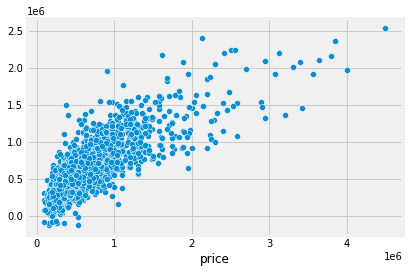

In [550]:
# Scatter plot to show Actual vs. Predicted Price
sns.scatterplot(Y_test, Y_pred)

In [551]:
# Setting my x and y
data = df1
X = data.drop(columns='price')
y = data['price']

In [552]:
# Getting baseline numbers
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(X_train, y_train))
print("Test R2: ", linreg.score(X_test, y_test))

print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.6452421222965574
Test R2:  0.6406490136867494
Train RMSE:  209379.36109883533
Test RMSE:  220189.3654955017


In [553]:
# importing model function

def model(X_train, X_test, y_train, y_test):
     
    # statsmodels
    features = X_train.copy()
    features['price'] = y_train
    
    formula = 'price~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    
    display(model.summary())
    return model
    

In [554]:
model_1 = model(X_train, X_test, y_train, y_test)
model_1

Train R2:  0.6452421222965574
Test R2:  0.6406490136867494
Train RMSE:  209379.36109883533
Test RMSE:  220189.3654955017


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3436.
Date:                Fri, 30 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:08:02   Log-Likelihood:            -2.3254e+05
No. Observations:               17010   AIC:                         4.651e+05
Df Residuals:                   17000   BIC:                         4.652e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      4.59e+06   9.41e+04     48.796      0.000    4.41e+06    4.77e+06
bedrooms     -4.564e+04   2486.226    -18.357      0.000   -5.05e+04   -4.08e+04
bathrooms     5.019e+04   3796.326     13.222      0.000    4.28e+04    5.76e+04
sqft_living    171.6467      3.654     46.979      0.000     164.485     178.808
sqft_lot        -0.1864      0.039     -4.727      0.000      -0.264      -0.109
floors        2.327e+04   3723.445      6.250      0.000     1.6e+04    3.06e+04
condition     2.147e+04   2684.839      7.998      0.000    1.62e+04    2.67e+04
grade         1.286e+05   2348.300     54.773      0.000    1.24e+05    1.33e+05
yr_built     -3743.2455     72.828    -51.398      0.000   -3885.996   -3600.495
waterfront_n  1.922e+06    4.8e+04     40.040      0.000    1.83e+06    2.02e+06
waterfront_y  2.669e+06   4.82e+04     55.412      0.000    2.57e+06    2.76e+06
==============================================================================
Omnibus:                    10800.849   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           403081.791
Skew:                           2.501   Prob(JB):                         0.00
Kurtosis:                      26.317   Cond. No.                     4.19e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.9e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

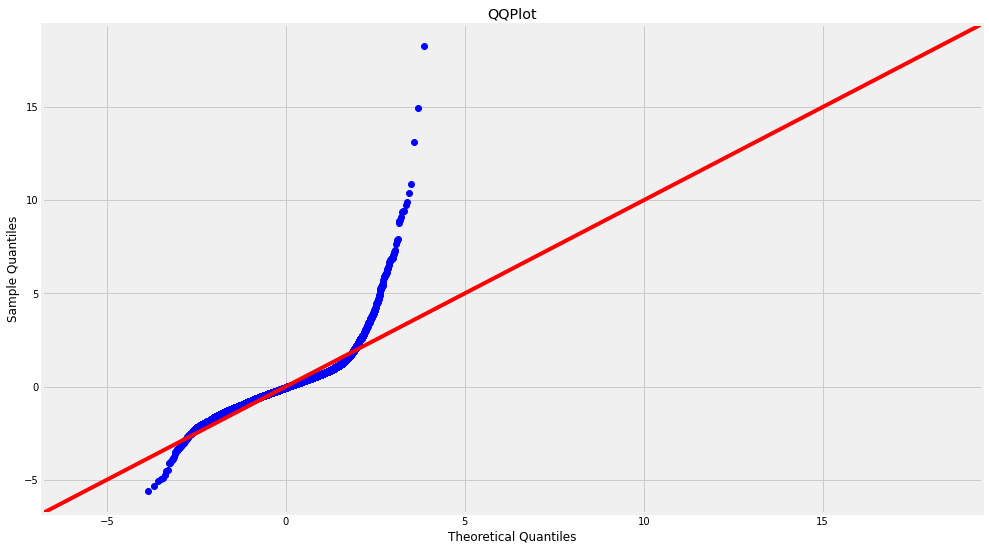

In [555]:
fig, ax = plt.subplots(figsize=(15,9))
sm.graphics.qqplot(model_1.resid, dist=stats.norm, line='45', fit=True, ax=ax);
ax.set_title('QQPlot')
plt.show()

- Baseline

<ipython-input-556-50ec5ac214d8>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


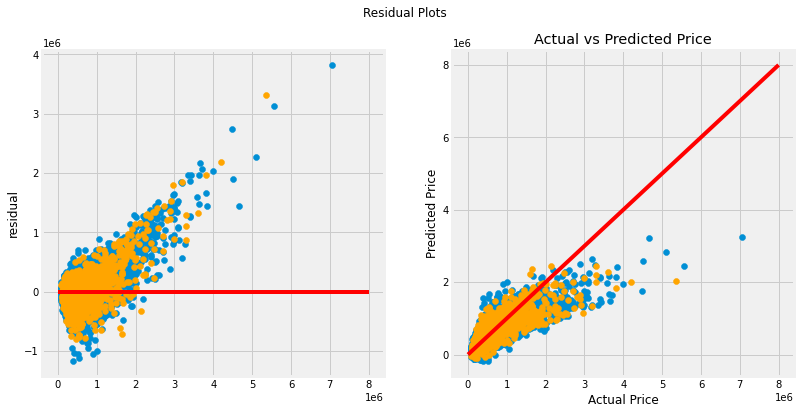

In [556]:
# Resid plots to show linearity
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Residual Plots')

axes[0].scatter(y_train, y_train-y_hat_train)
axes[0].scatter(y_test, y_test-y_hat_test, color='orange')
axes[0].set(xlabel='', ylabel='residual', title='')
axes[0].hlines(0, xmin=0, xmax=8000000, colors='red')

axes[1].scatter(y_train, y_hat_train)
axes[1].scatter(y_test, y_hat_test, color='orange')
axes[1].plot([0, 8000000], [0, 8000000], color='red', linestyle='-')
axes[1].set(xlabel='Actual Price', ylabel='Predicted Price',
            title='Actual vs Predicted Price')
fig.show()

Removing outliers

In [600]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = data.apply(stats.iqr)
df_out = df1[~((X < (Q1-1.5*IQR)) | (X > Q3+1.5*IQR)).any(axis=1)]
df_out

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,waterfront_n,waterfront_y
0,221900.0,3,1.00,1180,5650,1.0,3,7,1955,1,0
1,538000.0,3,2.25,2570,7242,2.0,3,7,1951,1,0
2,180000.0,2,1.00,770,10000,1.0,3,6,1933,1,0
3,604000.0,4,3.00,1960,5000,1.0,5,7,1965,1,0
4,510000.0,3,2.00,1680,8080,1.0,3,8,1987,1,0
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,3,8,2009,1,0
21593,400000.0,4,2.50,2310,5813,2.0,3,8,2014,1,0
21594,402101.0,2,0.75,1020,1350,2.0,3,7,2009,1,0
21595,400000.0,3,2.50,1600,2388,2.0,3,8,2004,1,0


In [601]:
x_var = df_out.drop(columns = 'price')
y = df_out['price']

In [602]:
X_train, X_test, y_train, y_test = train_test_split(x_var, y.loc[x_var.index], test_size=0.2)

In [604]:
model_2 = model(X_train, X_test, y_train, y_test)
model(X_train, X_test, y_train, y_test)

Train R2:  0.5259530258533242
Test R2:  0.5522046028255627
Train RMSE:  157509.70254856185
Test RMSE:  157036.50626884282


C:\Users\justi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     1922.
Date:                Fri, 30 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:17:51   Log-Likelihood:            -1.8568e+05
No. Observations:               13871   AIC:                         3.714e+05
Df Residuals:                   13862   BIC:                         3.714e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.873e+06   5.88e+04     48.853      0.000    2.76e+06    2.99e+06
bedrooms     -2.801e+04   2217.255    -12.633      0.000   -3.24e+04   -2.37e+04
bathrooms     3.031e+04   3310.882      9.155      0.000    2.38e+04    3.68e+04
sqft_living    135.6909      3.575     37.957      0.000     128.684     142.698
sqft_lot        -5.8326      0.451    -12.933      0.000      -6.717      -4.949
floors        1.987e+04   3420.771      5.808      0.000    1.32e+04    2.66e+04
condition     2.386e+04   2263.551     10.539      0.000    1.94e+04    2.83e+04
grade          1.25e+05   2349.873     53.176      0.000     1.2e+05     1.3e+05
yr_built     -3298.8660     60.810    -54.248      0.000   -3418.063   -3179.669
waterfront_n  2.873e+06   5.88e+04     48.853      0.000    2.76e+06    2.99e+06
waterfront_y          0          0        nan        nan           0           0
==============================================================================
Omnibus:                     4739.925   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37643.049
Skew:                           1.423   Prob(JB):                         0.00
Kurtosis:                      10.552   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Train R2:  0.5259530258533242
Test R2:  0.5522046028255627
Train RMSE:  157509.70254856185
Test RMSE:  157036.50626884282


C:\Users\justi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     1922.
Date:                Fri, 30 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:17:51   Log-Likelihood:            -1.8568e+05
No. Observations:               13871   AIC:                         3.714e+05
Df Residuals:                   13862   BIC:                         3.714e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.873e+06   5.88e+04     48.853      0.000    2.76e+06    2.99e+06
bedrooms     -2.801e+04   2217.255    -12.633      0.000   -3.24e+04   -2.37e+04
bathrooms     3.031e+04   3310.882      9.155      0.000    2.38e+04    3.68e+04
sqft_living    135.6909      3.575     37.957      0.000     128.684     142.698
sqft_lot        -5.8326      0.451    -12.933      0.000      -6.717      -4.949
floors        1.987e+04   3420.771      5.808      0.000    1.32e+04    2.66e+04
condition     2.386e+04   2263.551     10.539      0.000    1.94e+04    2.83e+04
grade          1.25e+05   2349.873     53.176      0.000     1.2e+05     1.3e+05
yr_built     -3298.8660     60.810    -54.248      0.000   -3418.063   -3179.669
waterfront_n  2.873e+06   5.88e+04     48.853      0.000    2.76e+06    2.99e+06
waterfront_y          0          0        nan        nan           0           0
==============================================================================
Omnibus:                     4739.925   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37643.049
Skew:                           1.423   Prob(JB):                         0.00
Kurtosis:                      10.552   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

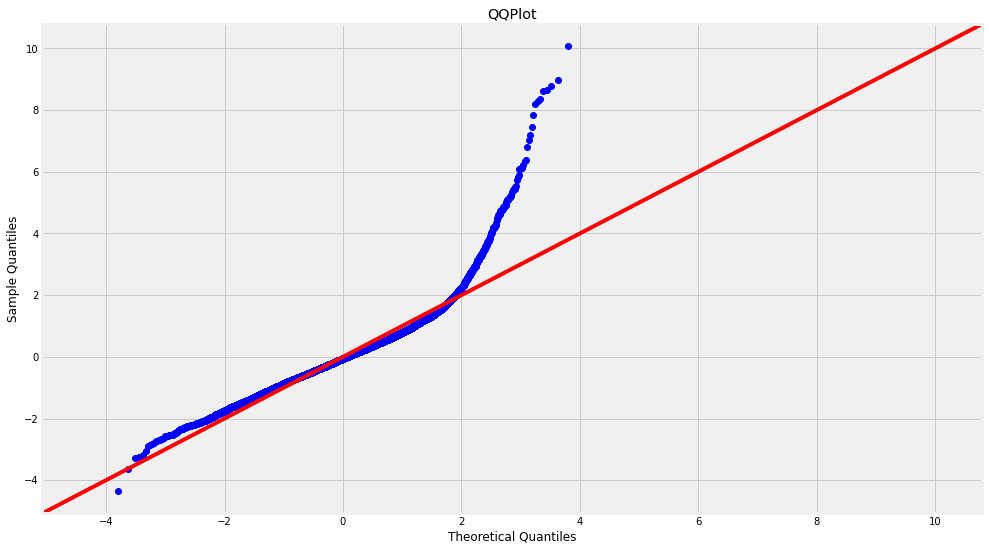

In [605]:
fig, ax = plt.subplots(figsize=(15,9))
sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True, ax=ax);
ax.set_title('QQPlot')
plt.show()

- R^2 has decreased, but the RMSE has also gone down.
- Skew and Kurtosis are down.

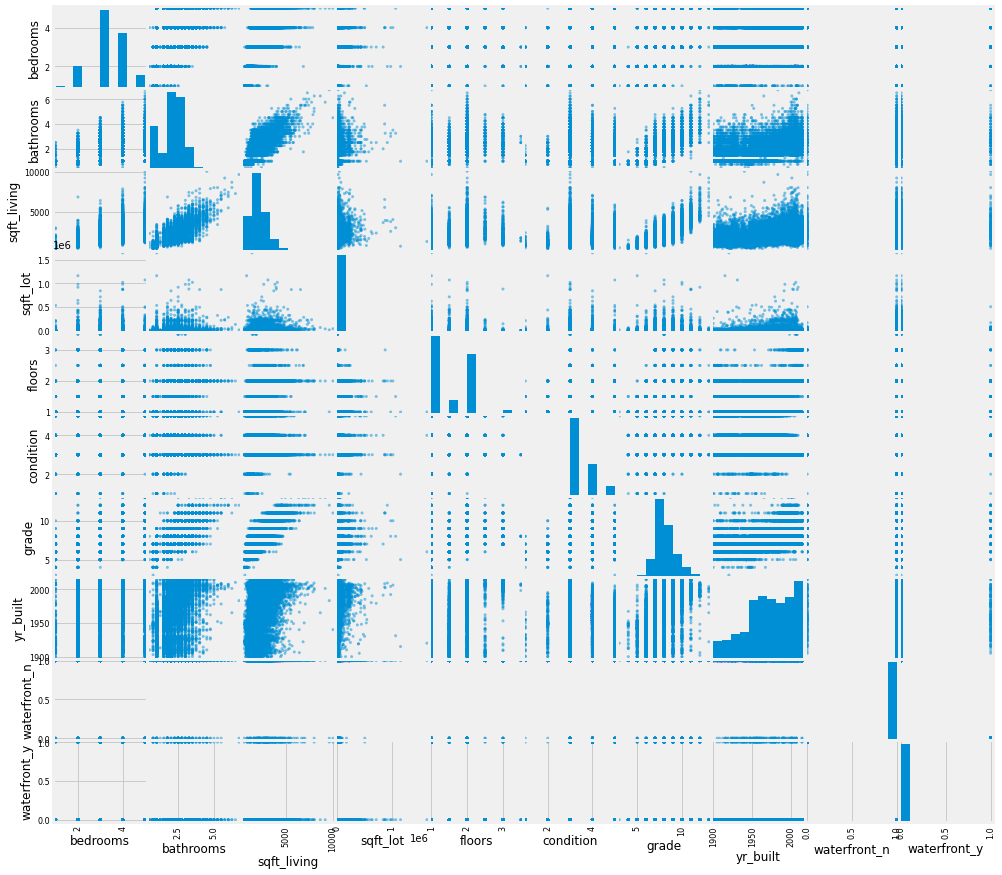

In [562]:
pd.plotting.scatter_matrix(df1_pred,figsize  = [15, 15]);
plt.show()

- Log Transforming different variables and showing the plots.

C:\Users\justi\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

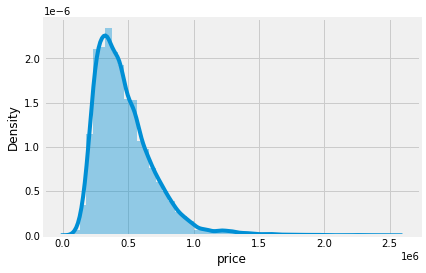

In [570]:
sns.distplot(df_out['price'])

<ipython-input-571-24a9d43eb2f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log['price'] = np.log(df1['price'])
C:\Users\justi\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


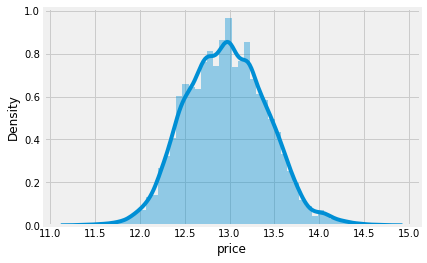

<Figure size 432x288 with 0 Axes>

In [571]:
df_log['price'] = np.log(df1['price'])
sns.distplot(df_log['price'])
fig = plt.figure();

<ipython-input-572-ecff7417f979>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log['bedrooms'] = df1['bedrooms']
C:\Users\justi\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


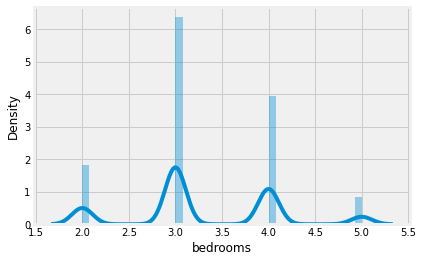

<Figure size 432x288 with 0 Axes>

In [572]:
df_log['bedrooms'] = df1['bedrooms']
sns.distplot(df_log['bedrooms'])
fig = plt.figure();

<ipython-input-573-05c3cf3d06b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log['bathrooms'] = df1['bathrooms']
C:\Users\justi\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


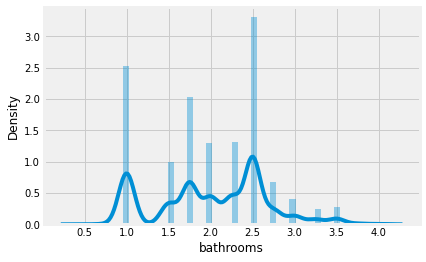

<Figure size 432x288 with 0 Axes>

In [573]:
df_log['bathrooms'] = df1['bathrooms']
sns.distplot(df_log['bathrooms'])
fig = plt.figure()

<ipython-input-574-bec4e401d9f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log['sqft_living'] = np.log(df1['sqft_living'])
C:\Users\justi\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


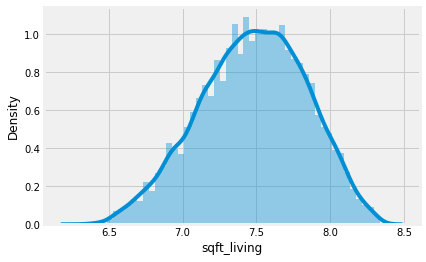

<Figure size 432x288 with 0 Axes>

In [574]:
df_log['sqft_living'] = np.log(df1['sqft_living'])
sns.distplot(df_log['sqft_living'])
fig = plt.figure()

<ipython-input-575-87273a04c10c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log['sqft_lot'] = np.log(df1['sqft_lot'])
C:\Users\justi\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


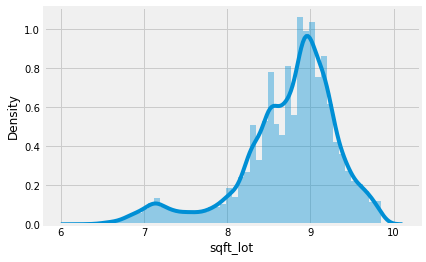

<Figure size 432x288 with 0 Axes>

In [575]:
df_log['sqft_lot'] = np.log(df1['sqft_lot'])
sns.distplot(df_log['sqft_lot'])
fig = plt.figure()

In [576]:
df_log

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,waterfront_n,waterfront_y
0,12.309982,3,1.00,7.073270,8.639411,1.0,3,7,1955,1,0
1,13.195614,3,2.25,7.851661,8.887653,2.0,3,7,1951,1,0
2,12.100712,2,1.00,6.646391,9.210340,1.0,3,6,1933,1,0
3,13.311329,4,3.00,7.580700,8.517193,1.0,5,7,1965,1,0
4,13.142166,3,2.00,7.426549,8.997147,1.0,3,8,1987,1,0
...,...,...,...,...,...,...,...,...,...,...,...
21592,12.793859,3,2.50,7.333023,7.030857,3.0,3,8,2009,1,0
21593,12.899220,4,2.50,7.745003,8.667852,2.0,3,8,2014,1,0
21594,12.904459,2,0.75,6.927558,7.207860,2.0,3,7,2009,1,0
21595,12.899220,3,2.50,7.377759,7.778211,2.0,3,8,2004,1,0


In [588]:
x_var = df_log.drop(columns=['price'])
y = df_log['price']

In [589]:
X_train, X_test, y_train, y_test = train_test_split(x_var, y.loc[x_var.index], test_size=0.2)

In [590]:
model_3 = model(X_train, X_test, y_train, y_test)
model_3

Train R2:  0.5426955368321473
Test R2:  0.535373402220843
Train RMSE:  0.30462946987060824
Test RMSE:  0.3018088048291491


C:\Users\justi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     2056.
Date:                Fri, 30 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:13:05   Log-Likelihood:                -3194.2
No. Observations:               13871   AIC:                             6406.
Df Residuals:                   13862   BIC:                             6474.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.3247      0.123     84.191      0.000      10.084      10.565
bedrooms        -0.0393      0.004     -8.990      0.000      -0.048      -0.031
bathrooms        0.0568      0.007      8.680      0.000       0.044       0.070
sqft_living      0.4961      0.014     36.651      0.000       0.470       0.523
sqft_lot        -0.1310      0.006    -23.264      0.000      -0.142      -0.120
floors           0.0038      0.007      0.552      0.581      -0.010       0.018
condition        0.0378      0.004      8.635      0.000       0.029       0.046
grade            0.2570      0.005     56.898      0.000       0.248       0.266
yr_built        -0.0062      0.000    -53.369      0.000      -0.006      -0.006
waterfront_n    10.3247      0.123     84.191      0.000      10.084      10.565
waterfront_y          0          0        nan        nan           0           0
==============================================================================
Omnibus:                       40.445   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.968
Skew:                          -0.059   Prob(JB):                     2.33e-11
Kurtosis:                       3.267   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

As we can see there was a great change after log transforming these variables. We will now try feature scaling. We want to try to wrangle in skew and kurtosis a bit more while seeing if we can improve our R2.

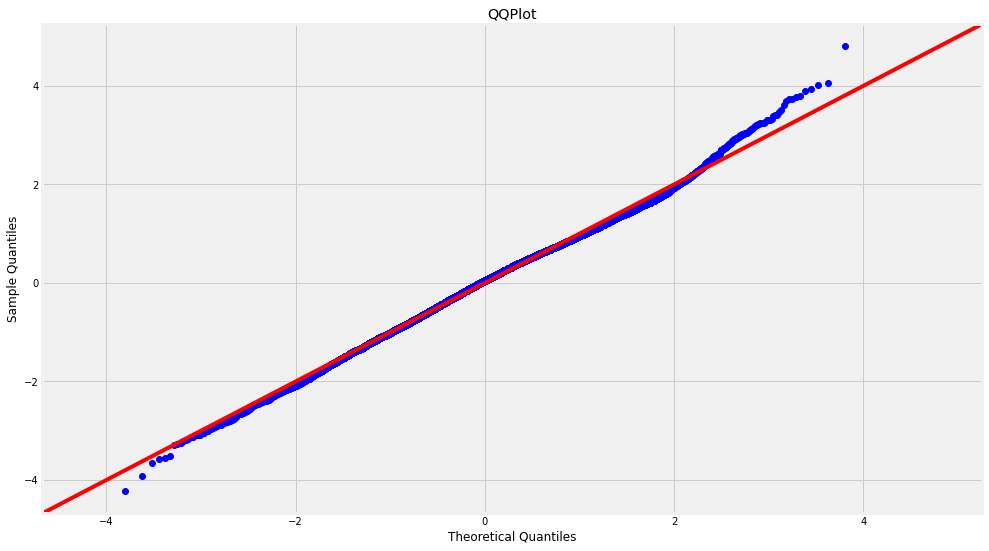

In [591]:
fig, ax = plt.subplots(figsize=(15,9))
sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True, ax=ax);
ax.set_title('QQPlot')
plt.show()

I will now scale features to achieve normality, reducing skew and kurtosis.

,log_sqftliving,log_sqftlot,logprice,bedrooms,bathrooms,floors,condition,grade,yr_built,waterfront_n,waterfront_y
0,0.371231,0.663371,0.291312,3,1.00,1.0,3,7,1955,1,0
1,0.758927,0.732401,0.550471,3,2.25,2.0,3,7,1951,1,0
2,0.158613,0.822132,0.230074,2,1.00,1.0,3,6,1933,1,0
3,0.623968,0.629385,0.584332,4,3.00,1.0,5,7,1965,1,0
4,0.547190,0.762848,0.534831,3,2.00,1.0,3,8,1987,1,0
...,...,...,...,...,...,...,...,...,...,...,...
21592,0.500607,0.216072,0.432907,3,2.50,3.0,3,8,2009,1,0
21593,0.705803,0.671279,0.463738,4,2.50,2.0,3,8,2014,1,0
21594,0.298656,0.265292,0.465271,2,0.75,2.0,3,7,2009,1,0
21595,0.522889,0.423893,0.463738,3,2.50,2.0,3,8,2004,1,0


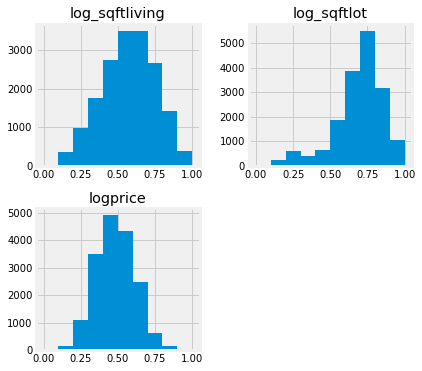

In [585]:
log_sqftliving = df_log['sqft_living']
log_sqftlot = df_log['sqft_lot']
logprice= df_log['price']

scaled_sqftliving = (log_sqftliving - min(log_sqftliving)) / (max(log_sqftliving) - min(log_sqftliving))
scaled_sqftlot = (log_sqftlot - min(log_sqftlot)) / (max(log_sqftlot) - min(log_sqftlot))
scaledprice = (logprice - min(logprice)) / (max(logprice) - min(logprice))

datascaled = pd.DataFrame([])
datascaled['log_sqftliving'] = scaled_sqftliving
datascaled['log_sqftlot'] = scaled_sqftlot
datascaled['logprice'] = scaledprice

datascaled.hist(figsize = [6,6]);
datascaled['bedrooms'] = df_log['bedrooms']
datascaled['bathrooms'] = df_log['bathrooms']
datascaled['floors'] = df_log['floors']
datascaled['condition'] = df_log['condition']
datascaled['grade'] = df_log ['grade']
datascaled['yr_built'] = df_log['yr_built']
datascaled['waterfront_n'] = df_log['waterfront_n']
datascaled['waterfront_y'] = df_log['waterfront_y']
datascaled

In [606]:
# Running scaled feature model
x_var = datascaled.drop(columns = 'logprice')
y= datascaled['logprice']
X_train, X_test, y_train, y_test = train_test_split(x_var, y.loc[x_var.index], test_size=0.2)
model_4 = model(X_train, X_test, y_train, y_test)
model_4


Train R2:  0.5419332746218822
Test R2:  0.5388222546872193
Train RMSE:  0.08845969948784885
Test RMSE:  0.09102574671967988


C:\Users\justi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     2050.
Date:                Fri, 30 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:25:11   Log-Likelihood:                 13958.
No. Observations:               13871   AIC:                        -2.790e+04
Df Residuals:                   13862   BIC:                        -2.783e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6988      0.033     51.801      0.000       1.635       1.763
log_sqftliving     0.2922      0.008     36.968      0.000       0.277       0.308
log_sqftlot       -0.1385      0.006    -23.582      0.000      -0.150      -0.127
bedrooms          -0.0112      0.001     -8.847      0.000      -0.014      -0.009
bathrooms          0.0159      0.002      8.321      0.000       0.012       0.020
floors             0.0027      0.002      1.346      0.178      -0.001       0.007
condition          0.0113      0.001      8.929      0.000       0.009       0.014
grade              0.0739      0.001     56.412      0.000       0.071       0.076
yr_built          -0.0018   3.39e-05    -53.523      0.000      -0.002      -0.002
waterfront_n       1.6988      0.033     51.801      0.000       1.635       1.763
waterfront_y            0          0        nan        nan           0           0
==============================================================================
Omnibus:                       50.965   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.065
Skew:                          -0.068   Prob(JB):                     2.02e-14
Kurtosis:                       3.301   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

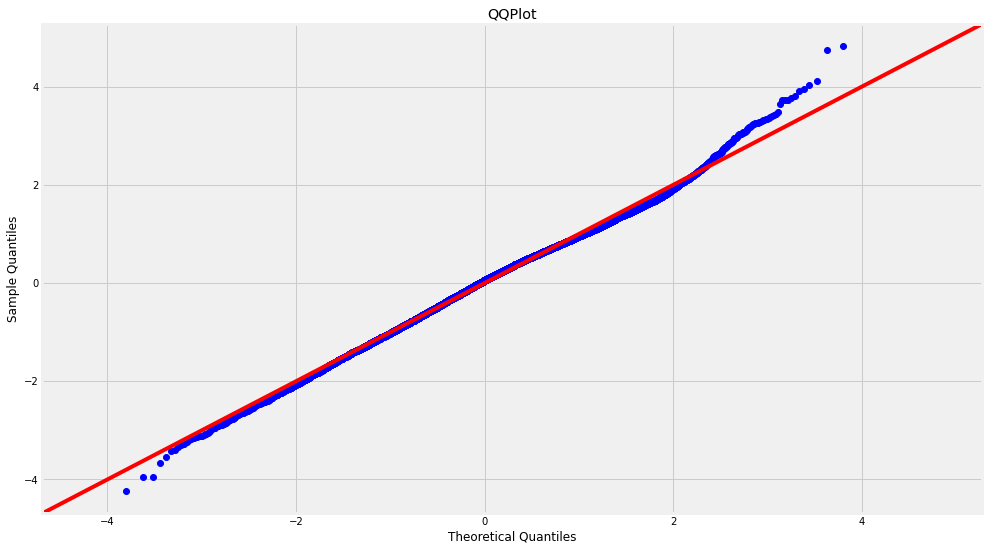

In [607]:
fig, ax = plt.subplots(figsize=(15,9))
sm.graphics.qqplot(model_4.resid, dist=stats.norm, line='45', fit=True, ax=ax);
ax.set_title('QQPlot')
plt.show()

In [619]:
coefdf = pd.DataFrame(model_4.params, columns=['Coefficient'])
coefdf = coefdf.drop('Intercept')
coefdf = coefdf.sort_values(by='Coefficient')

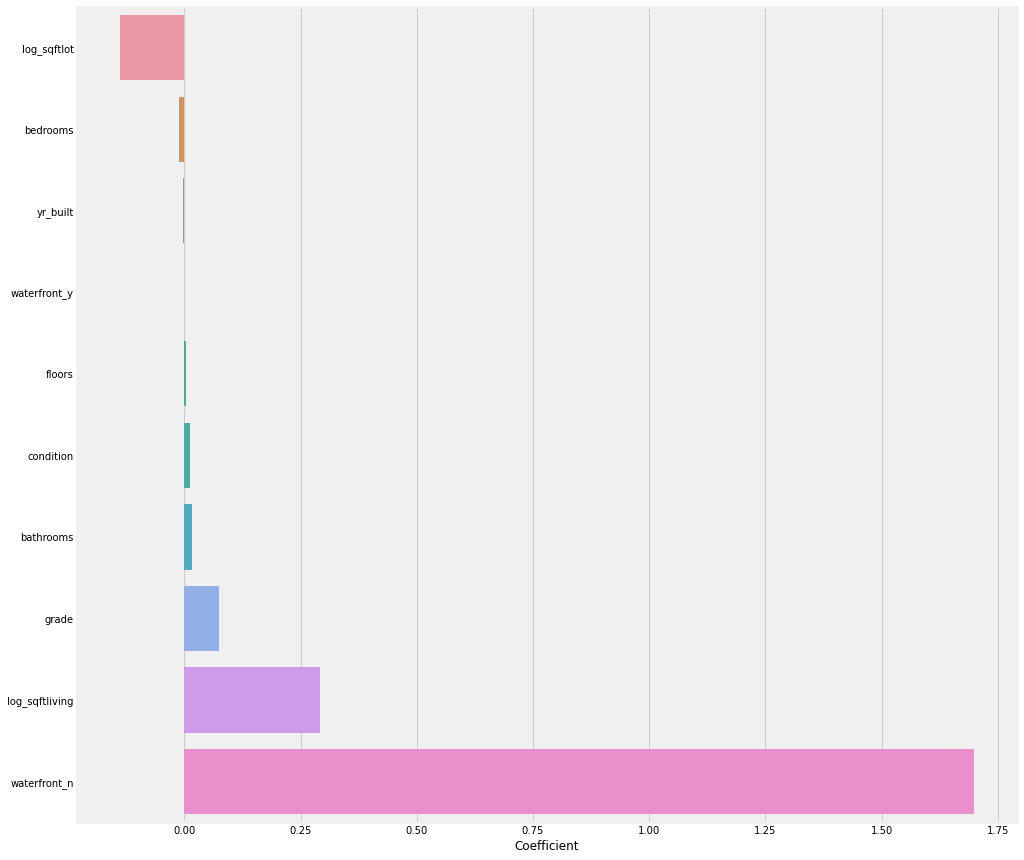

In [621]:
fig, ax = plt.subplots(figsize=(15,15))
sns.barplot(data=coefdf, y=coefdf.index, x='Coefficient', ax=ax);

# iNTERPRET

At the end, we find that we have achieved linearity between price and the variables. I am only somewhat confident this model could be used to fit the data. The final model fits much better than the original model, as it was scaled down to ensure linearity. I am certain it could assist in a basic renovation or home sale, as it highlights the features of the home most and least important to price.

# CONCLUSIONS & RECOMMENDATIONS

Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

The most positive features that influence the home are square footage of living space, having a waterfront, and the grade given by the county.

The least positive things are the square footage of lot, number of bedrooms, and the year in which it was built.

I could leave in more factors to improve the project in the future, such as the zipcodes in which homes are located, and I could also source more of my own data outside the box.